Dataset link:https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

**Machine Learning techniques are broadly divided into two parts :**

**Supervised Machine Learning**

**Unsupervised Machine Learning**

In Supervised Machine Learning, the data is labelled and the algorithm learns from labelled training data. Examples of this method are Classification and Regression.

In Unsupervised Machine Learning, we do not need to supervise the model. Such a method deals with unlabelled data. Unsupervised machine learning helps us find hidden and unknown patterns in data.

Often it easier to get unlabelled data as compared to labelled data, and in such cases, we can use unsupervised machine learning to work on the data. Data, which needs categorization can be categorized with the help of unsupervised machine learning.

**Clustering is a type of unsupervised machine learning in which the algorithm processes our data and divided them into “clusters”.**

## **The Clustering Explained**

Clustering algorithms try to find natural clusters in data, the various aspects of how the algorithms to cluster data can be tuned and modified. Clustering is based on the principle that items within the same cluster must be similar to each other. The data is grouped in such a way that related elements are close to each other.

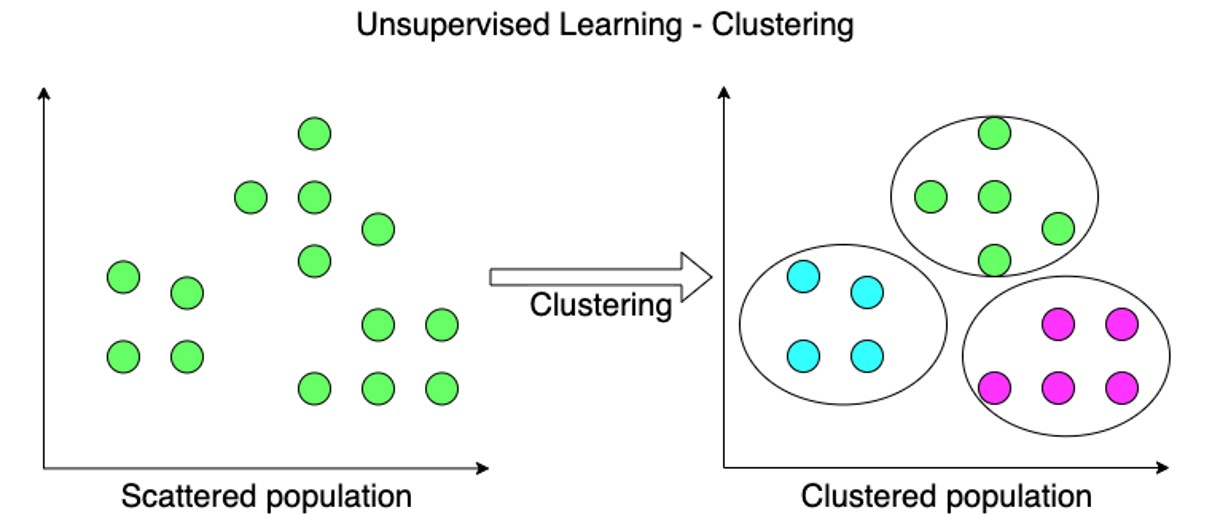

Diverse and different types of data are subdivided into smaller groups.

## **K-Means Clustering**

**K-Means clustering** is an **unsupervised machine learning algorithm** that divides the given data into the given number of clusters. Here, the “K” is the given number of predefined clusters, that need to be created.

It is a centroid based algorithm in which each cluster is associated with a centroid. **The main idea is to reduce the distance between the data points and their respective cluster centroid.**

The algorithm takes raw unlabelled data as an input and divides the dataset into clusters and the process is repeated until the best clusters are found.

K-Means is very easy and simple to implement. It is highly scalable, can be applied to both small and large datasets. There is, however, a problem with choosing the number of clusters or K. Also, with the increase in dimensions, stability decreases. But, overall K Means is a simple and robust algorithm that makes clustering very easy.

## **Goal:**

The main aim of this problem is learning the purpose of the customer segmentation concepts, also known as market basket analysis, trying to understand customers and sepparate them in different groups according to their preferences, and once the division is done, this information can be given to marketing team so they can plan the strategy accordingly.

The data includes the following features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (based on customer behaviour and spending nature)

# **Dependencies:**

Here we can find the libraries we will use in order to develop a solution for this problem.

**numpy|pandas:** Will help us treat and explore the data, and execute vector and matrix operations.

**matplotlib|seaborn:** Will help us plot the information so we can visualize it in different ways and have a better understanding of it.

**plotly:** Will also help us plotting data in a fancy way.

**sklearn:** Will provide all necessary tools to train our models and test them afterwards.



In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

## **Data Exploration**

In this section we are doing a little bit of data exploration, checking for null values, object data types and other things we might consider in order to keep our data clean and well structured.

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

1. Display Top 5 Rows of The Dataset

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Check Last 5 Rows of The Dataset

In [ ]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
#Checking the size of our data
data.shape

(200, 5)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 200
Number of Columns 5


In [ ]:
#Changing the name of some columns
data = data.rename(columns={'Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})

4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Since Gender is not a numerical value but an object, we are going to replace these values. Female will be 0 and Male will be 1 from now on.

In [ ]:
#Replacing objects for numerical values
data['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [ ]:
#Checking values have been replaced properly
data.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64


5.Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

## **Data Visualization**

Now it's the moment to visualize our data and plot important information so we can see the different values our data has and its behaviour. To do so, we are only going to consider the following features: Annual_income, Spending_score and Age. Gender will only be used to make data sepparation so we can differentiate values for men and women.

To begin with, we are plotting the histograms for each of the three features we said we would look into:

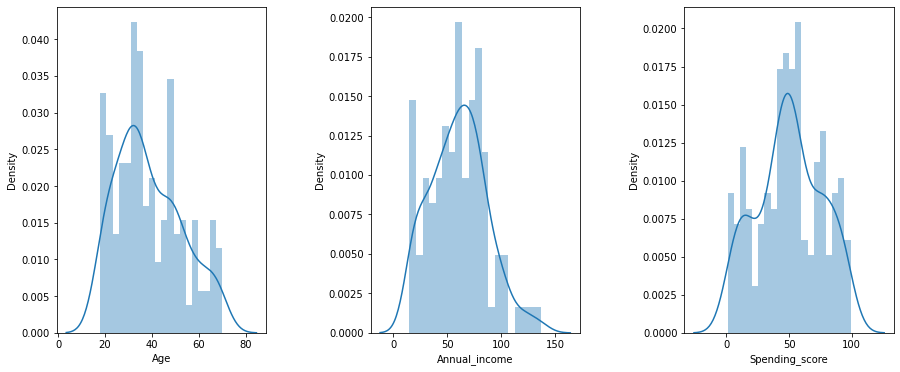

In [ ]:
#Density estimation of values using distplot
plt.figure(1 , figsize = (15 , 6))
feature_list = ['Age','Annual_income', "Spending_score"]
feature_listt = ['Age','Annual_income', "Spending_score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(data[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

In these histograms we can observe that the distribution of these values resembles a Gaussian distribution, where the vast majority of the values lay in the middle with some exceptions in the extremes.

Now that we have plot the distribution of values through histograms, let's plot the relation between variables using gender as a class distinction. In order to do so we are using the function pairplot given by the Seaborn library, we are using some parameters as well so we can visualize the gender class separation better.

That said, before doing that, let's check how many women and men there are in our data!

0    112
1     88
Name: Gender, dtype: int64

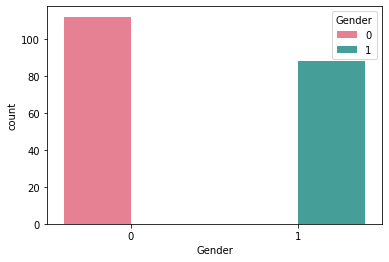

In [ ]:
#Count and plot gender
sns.countplot(x = 'Gender', data = data, palette="husl", hue = "Gender")
data["Gender"].value_counts()

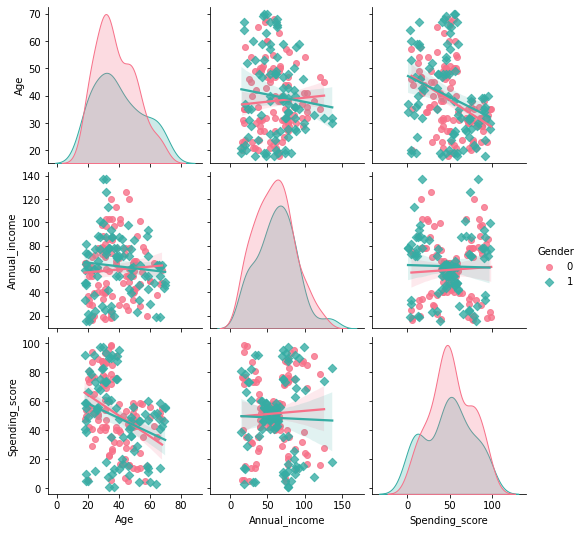

In [ ]:
#Pairplot with variables we want to study
sns.pairplot(data, vars=["Age", "Annual_income", "Spending_score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['o','D'])

A pair plot is a type of plot in which multiple pairwise scatter plots are created for a given dataset. In a pair plot, each variable is compared against every other variable, resulting in a matrix of scatter plots.

Pair plots are commonly used for exploratory data analysis (EDA) to visually assess the relationships and patterns between multiple variables in a dataset. They are particularly useful when the dataset has multiple variables and it's important to quickly understand the correlations between them.

By visualizing the relationships between variables, pair plots can help identify any trends, clusters, or outliers in the data, as well as any potential issues with the data, such as missing or incorrect values.

In addition to scatter plots, pair plots can also include other types of plots, such as histograms and density plots, to provide additional insights into the distribution of the data. Seaborn's pairplot function, for example, allows you to specify the type of plot to use for the diagonal (e.g., histogram, kernel density estimate) and off-diagonal plots (e.g., scatter plot, hexbin plot).

Overall, pair plots are a powerful and flexible tool for data exploration and analysis, and are widely used in various fields including statistics, machine learning, and data science.

# **Observation:**
In this pairplot graphic we can clearly observe the relation between the different variables we have in our dataset and we will explain this relation better in the following section. Having said that it's interesting to take a look at the diagonal of this pairplot where we can see the same histograms we've studied before, but this time making a differentiation between women and man, for each value of each variable we can now see the proportion between men and women and, as we can observe, the pink colour can be found in a higher ratio than the blue one, since there are more women than men, as we've just seen.

Now let's take a better look at some relations between these different variables and extract some important information before the clustering process takes place!

# Age and Annual Income

lmplot is a function provided by the Seaborn visualization library that creates a linear regression plot between two variables in a dataset. It's a useful tool for exploring the relationship between two variables and visualizing the fit of a linear model to the data.

lmplot can also take additional arguments to customize the plot, such as the color of the regression line, markers for the data points, and the size and shape of the plot. You can also use other Seaborn functions, such as hue and col, to add additional dimensions to the plot and compare the relationship between the two variables across different groups or subsets of the data.

Overall, lmplot is a useful function for exploring the relationship between two variables and understanding how well a linear model fits the data. It's commonly used in data visualization and analysis, particularly in the fields of statistics and data science.

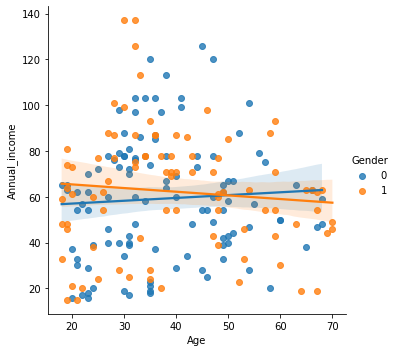

In [ ]:
sns.lmplot(x = "Age", y = "Annual_income", data = data, hue = "Gender")

Observation:

In this graphic we can clearly see how people in their thirties, forties and fifthies tend to earn more money annually than the ones younger than thirty or older than fifty years old. That is to say people whose age lays between thirty and fifty years old seem to get better jobs since they might be better prepared or be already more experienced than younglings or older people. In the graphic we can also see how males tend to earn a little bit more money than females, at least until fifty years old.

## **Spending Score and Annual Income**

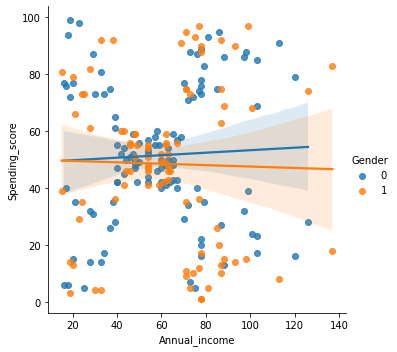

In [ ]:
sns.lmplot(x = "Annual_income", y = "Spending_score", data = data, hue = "Gender")

Here we can observe how a better annual income leads to having a higher spending score, specially for women. However the correlation between these two variables isn't that big, we seem to find the majority of people in the middle, people who have decent salaries and have a reasonably high spending score.

## **Age and Spending Score**

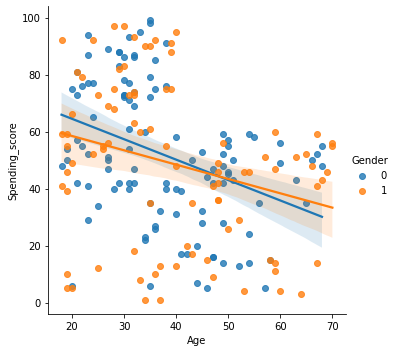

In [ ]:
sns.lmplot(x = "Age", y = "Spending_score", data = data, hue = "Gender")

In this last graphic we get to see something we could predict, young people tend to spend way more than older people. That can be due to many reasons: young people usually have more free time than old people, shopping malls tend to have shops that target young people such as videogames and tech stores, etc.

6. Get Overall Statistics About The Dataset

In [ ]:
data.describe()

,CustomerID,Gender,Age,Annual_income,Spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


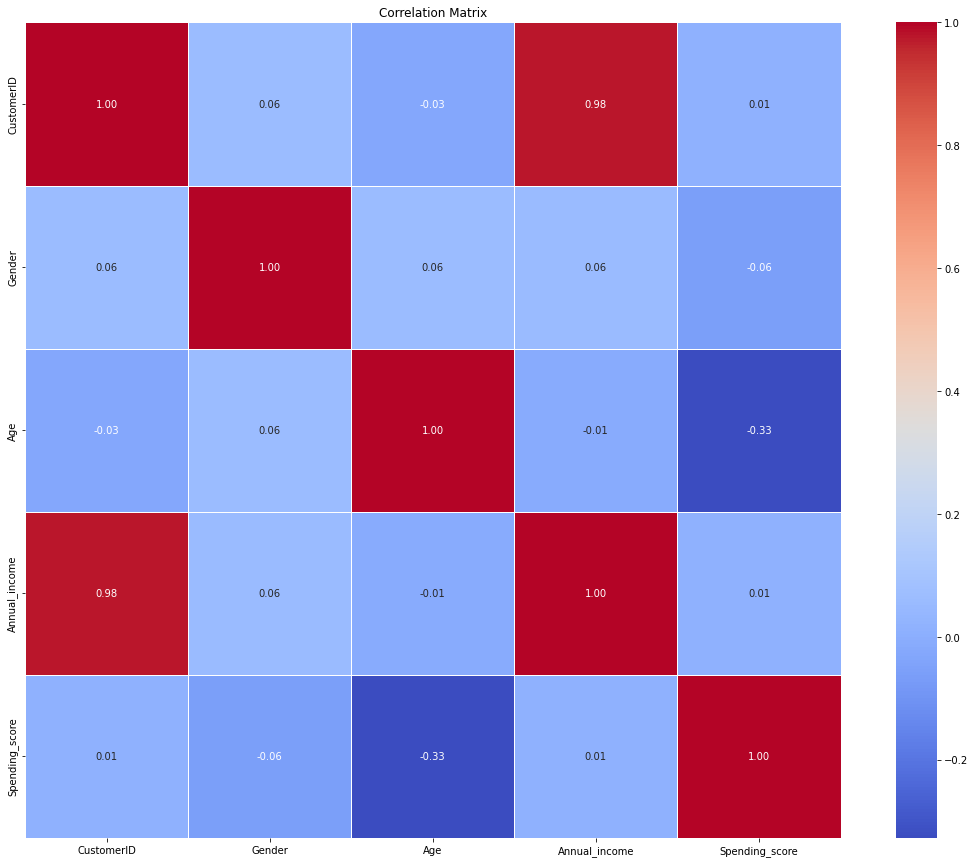

In [ ]:
import matplotlib.pyplot as plt

corr = data.corr()

# plot correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


7. Kmeans Clustering

Now that we have already understood this dataset a little bit it's time to decide the amount of clusters we want to divide our data in. To do so, we are going to use the Elbow Method.

In [ ]:

data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_income', 'Spending_score'], dtype='object')

In [ ]:
X = data[['Annual_income','Spending_score']]

In [ ]:
X.head()


,Annual_income,Spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k and one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. In this problem, we are using the inertia as cost function in order to identify the sum of squared distances of samples to the nearest cluster centre.

Looking at this particular example, if we imagine the line in the graphic is an arm, the elbow can be found, approximately, where the number of clusters is equal to 5. Therefore we are selecting 5 as the number of clusters to divide our data in.

## **Clustering**

In the process of clustering we will not be considering the gender factor anymore. The first main reason of why we do take this approach is because the difference between male and female in this data is not particularly high and making a gender differentiaton won't provide any further information. The second and not least important reason is the fact that stores, in general, hardly ever target a specific gender anymore, in almost every store in a shopping center male and female products can be found.

Additionally we do not want to interfere in the process of unsupervised learning, we will leave the algorithm do its job and once it's finished we will analyze the results and extract conclusions and knowledge.

Choosing the Annual Income Column & Spending Score column

In [ ]:
X = data.iloc[:,[3,4]].values

In [ ]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

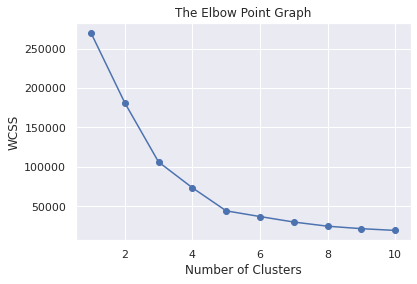

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss, 'bo-')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters - 0, 1, 2, 3, 4

Visualizing all the Clusters

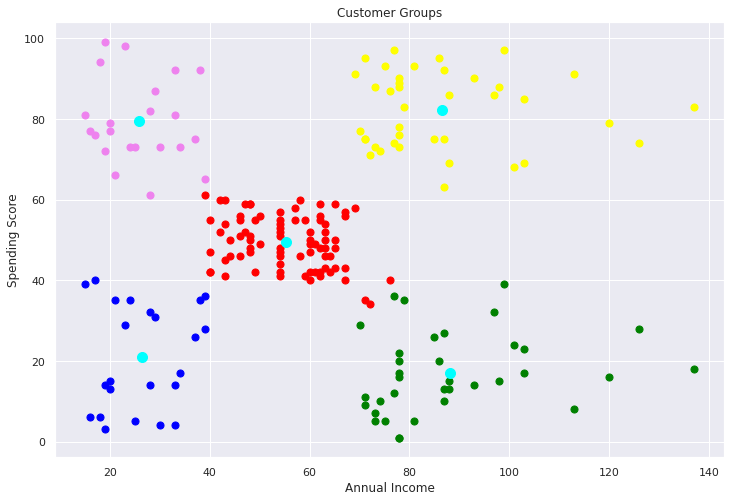

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(12,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

As we can observe, the K-means algorithm has already finished its work and now it's time to plot the results we obtained by it so we can visualize the different clusters and analyze them.

## **3D - Cluters**

In [ ]:
#Training kmeans with 5 clusters
X1 = data.loc[:,["Age", "Annual_income", "Spending_score"]]
means_k = KMeans(n_clusters=5, random_state=0)
means_k.fit(X1)
labels = means_k.labels_
centroids = means_k.cluster_centers_

In [ ]:
#Create a 3d plot to view the data sepparation made by Kmeans
trace1 = go.Scatter3d(
    x= X1['Spending_score'],
    y= X1['Annual_income'],
    z= X1['Age'],
    mode='markers',
     marker=dict(
        color = labels, 
        size= 10,
        line=dict(
            color= labels,
        ),
        opacity = 0.9
     )
)
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Spending_score'),
            yaxis = dict(title  = 'Annual_income'),
            zaxis = dict(title  = 'Age')
        )
)
fig = go.Figure(data=trace1, layout=layout)
py.offline.iplot(fig)

After plotting the results obtained by K-means on this 3D graphic, it's our job now to identify and describe the five clusters that have been created:

**Yellow Cluster**  - The Yellow cluster groups young people with moderate to low annual income who actually spend a lot.

**Purple Cluster** - The purple cluster groups reasonably young people with pretty decent salaries who spend a lot.

**Pink Cluster** - The pink cluster basically groups people of all ages whose salary isn't pretty high and their spending score is moderate.

**Orange Cluste**r - The orange cluster groups people who actually have pretty good salaries and barely spend money, their age usually lays between thirty and sixty years.

**Blue Cluster** - The blue cluster groups whose salary is pretty low and don't spend much money in stores, they are people of all ages.

## **Conclusions**

After developing a solution for this problem, we have come to the following conclusions:

KMeans Clustering is a powerful technique in order to achieve a decent customer segmentation.

Customer segmentation is a good way to understand the behaviour of different customers and plan a good marketing strategy accordingly.

There isn't much difference between the spending score of women and men, which leads us to think that our behaviour when it comes to shopping is pretty similar.

Observing the clustering graphic, it can be clearly observed that the ones who spend more money in malls are young people. That is to say they are the main target when it comes to marketing, so doing deeper studies about what they are interested in may lead to higher profits.

Althought younglings seem to be the ones spending the most, we can't forget there are more people we have to consider, like people who belong to the pink cluster, they are what we would commonly name after "middle class" and it seems to be the biggest cluster.

Promoting discounts on some shops can be something of interest to those who don't actually spend a lot and they may end up spending more!